### Importación de datos



In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [60]:
tiendas = [tienda, tienda2, tienda3, tienda4]

In [61]:
ventas_tiendas = [sum(tiend.Precio) for tiend in tiendas]
datos_tiendas = [{"Ventas": ventas} for ventas in ventas_tiendas]
datos_tiendas

[{'Ventas': 1150880400.0},
 {'Ventas': 1116343500.0},
 {'Ventas': 1098019600.0},
 {'Ventas': 1038375700.0}]

# 2. Ventas por categoría

In [62]:

def contarCategorias(tiendas):
  categorias = {}
  cantidadCategoria = []
  for i in range(len(tiendas)):

    for index, row in tiendas[i].iterrows():

      categoria = row['Categoría del Producto']

      if(categoria in categorias.keys()):

        if(len(categorias[categoria])>i):


          categorias[categoria][i] +=1
        else:
          categorias[categoria].append(1)
      else:
        categorias[categoria] = [1]
  return categorias

In [63]:
ventas_categorias = contarCategorias(tiendas)
ventas_categorias

{'Electrónicos': [448, 422, 451, 451],
 'Muebles': [465, 442, 499, 480],
 'Juguetes': [324, 313, 315, 338],
 'Electrodomésticos': [312, 305, 278, 254],
 'Artículos para el hogar': [171, 181, 177, 201],
 'Deportes y diversión': [284, 275, 277, 277],
 'Libros': [173, 197, 185, 187],
 'Instrumentos musicales': [182, 224, 177, 170]}

# 3. Calificación promedio de la tienda


In [64]:
for i in range(len(datos_tiendas)):
  datos_tiendas[i]["Calificación Promedio"] = sum(tiendas[i]['Calificación'])/len(tiendas[i]['Calificación'])



# 4. Productos más y menos vendidos

In [65]:
def masYMenosVendidos(tienda: pd.DataFrame):

  producto = []
  cantidad = []
  for i in tienda['Producto']:
    if(i in producto):
      cantidad[producto.index(i)] +=1
    else:
      producto.append(i)
      cantidad.append(1)

  indiceMasVendido = cantidad.index(max(cantidad))
  indiceMenosVendido = cantidad.index(min(cantidad))

  masVendido = {
          "producto" : producto[indiceMasVendido],
          "cantidad" : cantidad[indiceMasVendido]
      }

  menosVendido = {
          "producto" : producto[indiceMenosVendido],
          "cantidad" : cantidad[indiceMenosVendido]
      }

  return [masVendido, menosVendido]



In [66]:
for i in range(len(datos_tiendas)):
  product = masYMenosVendidos(tiendas[i])
  datos_tiendas[i]["Producto Mas Vendido"] = product[0]
  datos_tiendas[i]["Producto Menos Vendido"] = product[1]


# 5. Envío promedio por tienda

In [67]:
for i in range(len(datos_tiendas)):
  datos_tiendas[i]["Envio promedio"] = sum(tiendas[i]['Costo de envío'])/len(tiendas[i])



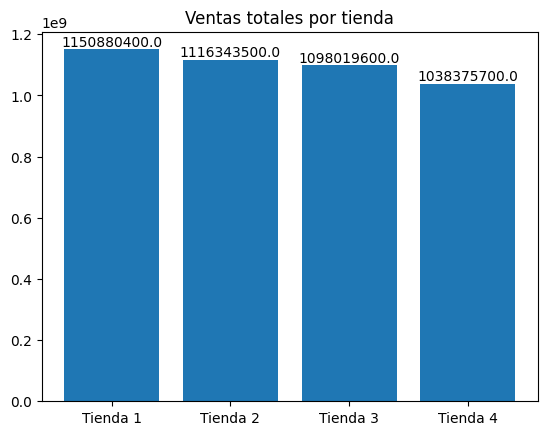

In [74]:
import matplotlib.pyplot as plt

labels = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]



barras = plt.bar(labels, ventas_tiendas)
plt.bar_label(barras, labels=ventas_tiendas)
plt.title("Ventas totales por tienda")

plt.show()

(0.0, 600.0)

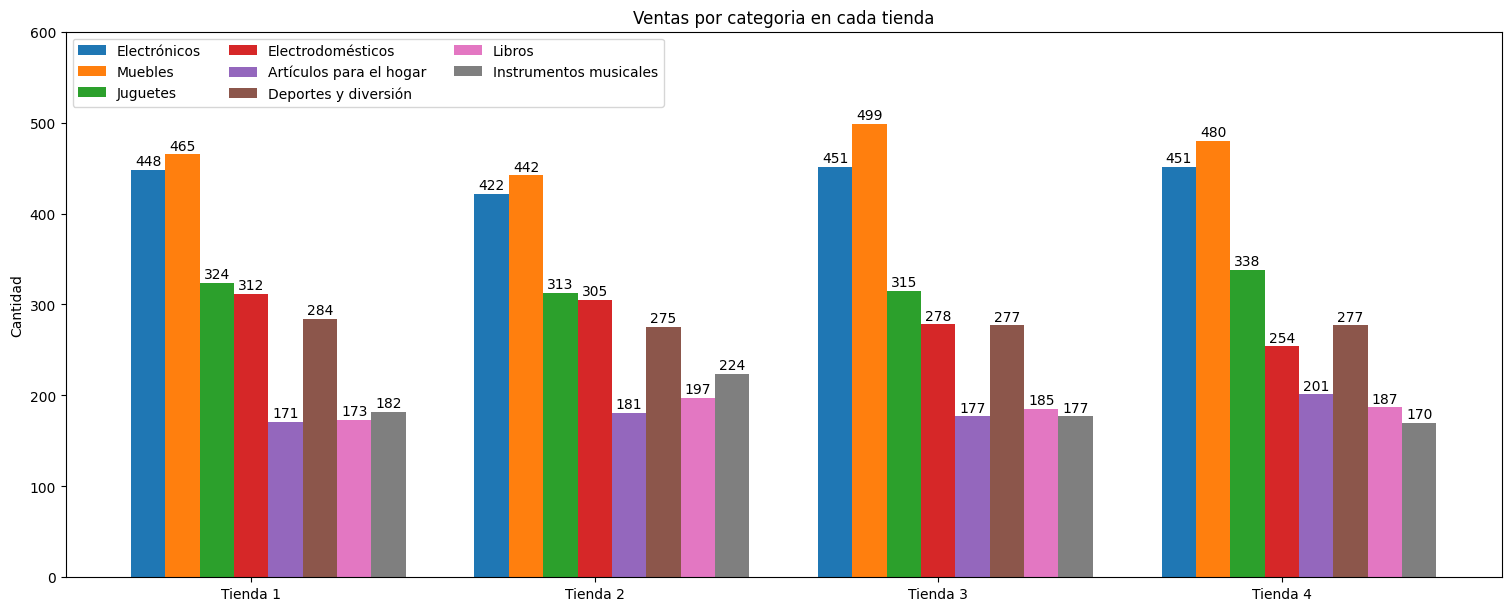

In [69]:
import numpy as np

x = np.arange(len(labels))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for categoria, cantidad in ventas_categorias.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, cantidad, width, label=categoria)
    ax.bar_label(rects, padding=1)
    multiplier += 1


fig.set_figwidth(15)
fig.set_figheight(6)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Ventas por categoria en cada tienda')
ax.set_xticks(x + 0.3, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 600)



In [70]:
tendenciaProductos = [{'masVendido' : tienda['Producto Mas Vendido'], 'menosVendido': tienda['Producto Menos Vendido']} for tienda in datos_tiendas]
productos = [[x['masVendido']['producto'], x['menosVendido']['producto']] for x in tendenciaProductos]
cantidad = [[x['masVendido']['cantidad'], x['menosVendido']['cantidad']] for x in tendenciaProductos]
productos

[['Microondas', 'Auriculares con micrófono'],
 ['Iniciando en programación', 'Juego de mesa'],
 ['Kit de bancas', 'Bloques de construcción'],
 ['Cama box', 'Guitarra eléctrica']]

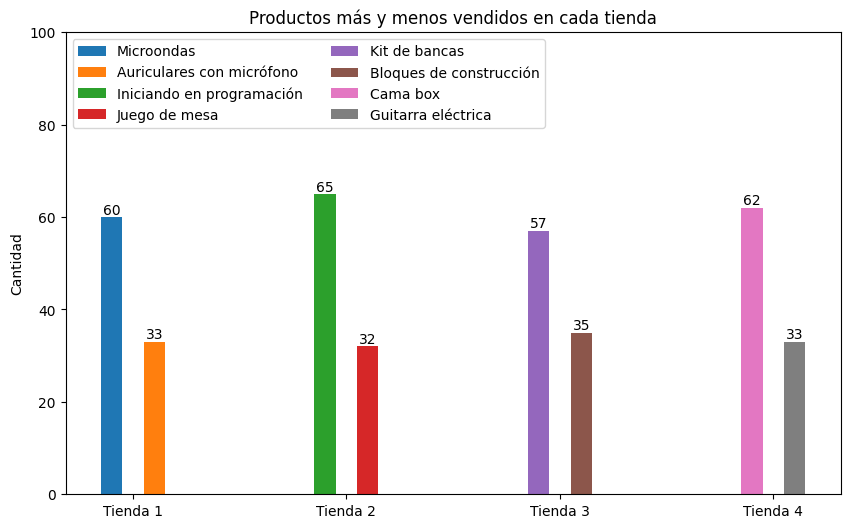

In [72]:
x = np.arange(4)

width = 0.1

fig, ax = plt.subplots()

for i in range(len(productos)):
  bar_mas = ax.bar(i+width, cantidad[i][0], width, label=productos[i][0])
  ax.bar_label(bar_mas, padding=0)
  bar_menos = ax.bar(i+width++0.2, cantidad[i][1], width, label=productos[i][1])
  ax.bar_label(bar_menos, padding=0)


ax.set_ylabel('Cantidad')
ax.set_title('Productos más y menos vendidos en cada tienda')
ax.set_xticks(x + 0.2, labels)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 100)

fig.set_figwidth(10)
fig.set_figheight(6)


In [73]:
datos_tiendas

[{'Ventas': 1150880400.0,
  'Calificación Promedio': 3.976685036032217,
  'Producto Mas Vendido': {'producto': 'Microondas', 'cantidad': 60},
  'Producto Menos Vendido': {'producto': 'Auriculares con micrófono',
   'cantidad': 33},
  'Envio promedio': 26018.60958033065},
 {'Ventas': 1116343500.0,
  'Calificación Promedio': 4.037303942348453,
  'Producto Mas Vendido': {'producto': 'Iniciando en programación',
   'cantidad': 65},
  'Producto Menos Vendido': {'producto': 'Juego de mesa', 'cantidad': 32},
  'Envio promedio': 25216.235693090293},
 {'Ventas': 1098019600.0,
  'Calificación Promedio': 4.048325561678677,
  'Producto Mas Vendido': {'producto': 'Kit de bancas', 'cantidad': 57},
  'Producto Menos Vendido': {'producto': 'Bloques de construcción',
   'cantidad': 35},
  'Envio promedio': 24805.680373039424},
 {'Ventas': 1038375700.0,
  'Calificación Promedio': 3.9957591178965224,
  'Producto Mas Vendido': {'producto': 'Cama box', 'cantidad': 62},
  'Producto Menos Vendido': {'product

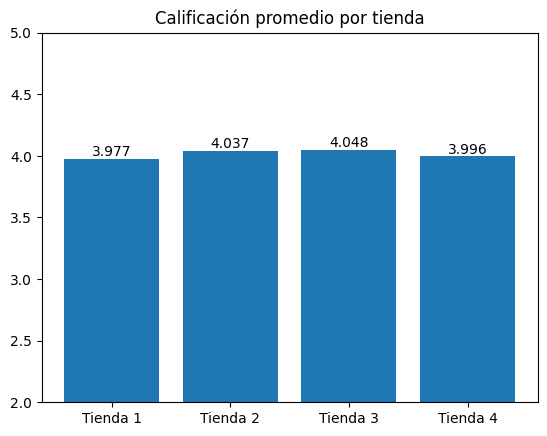

In [85]:
califPromedio = [np.round(x['Calificación Promedio'],3) for x in datos_tiendas]
envioPromedio = [np.round(x['Envio promedio'],2) for x in datos_tiendas]

barra_calif = plt.bar(labels, califPromedio)
plt.bar_label(barra_calif, labels=califPromedio)
plt.title("Calificación promedio por tienda")

plt.ylim(2, 5)

plt.show()

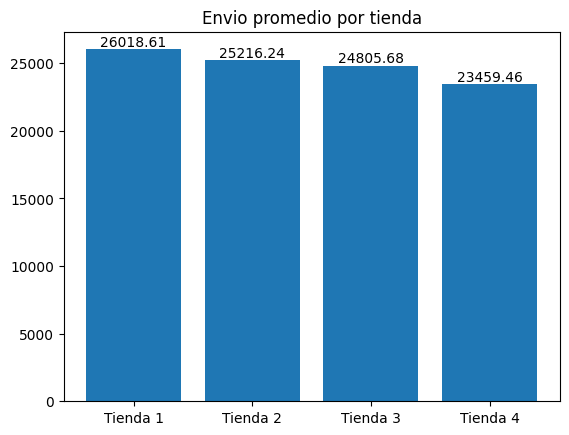

In [82]:
barra_envio = plt.bar(labels, envioPromedio)
plt.bar_label(barra_envio, labels=envioPromedio)
plt.title("Envio promedio por tienda")

plt.show()

# Análisis de tiendas del Sr. Juan

Tomando en cuenta las necesidades de Sr. Juan de diversificar su cartera de inversión y tomar partida de otro tipo de negocio, se le solicitó al equipo de Analistas de Datos proporcionar en base a análisis y estudios estadísticos, ¿cuál sería la tienda que convendría más vender?

Atendiendo a tal petición, a continuación, el equipo de analista muestra un grupo de resultados de análisis estadísticos y recomienda a una de las cuatro tiendas para ser vendidas.

## Análisis de ventas
#### El primero análisis aplicado a las tiendas fue la comparación de las ventas de cada uno. En base a este gráfico que contiene las ventas acumuladas de cada tienda, se destacan algunos detalles.



1. La tienda con mayor número de ventas de las 4 es la tienda 1.
2. La tienda 4 resalta como la que menos ventas ha generado.

##Análisis de categorías

#### Luego, se analizaron la frecuencia de venta de cada categoría en las 4 tiendas, lo que dio como resultado el siguiente gráfico. Observaciones importantes:



1. En todas las tiendas las categorías que lideran en ventas son los muebles y los electrónicos.
2. En el mismo orden, las categorías menos vendidas en todas las tiendas son instrumentos musicales y artículos para el hogar.


##Análisis de productos más y menos vendidos

#### A partir del análisis de categorías, se obtuvieron los productos más y menos vendidos de cada tienda.


1. Las tiendas 3 y 4 tienen como productos más vendidos "Kit de bancas" y "Cama box", respectivamente. Estos productos pertenecen a una de las categorías menos vendidas en las 4 tiendas, que es **artículos para el hogar**.



##Análisis de satisfacción de los clientes

####Un indicador clave de la permanencia o no de una tienda es cómo la perciben sus clientes. Estas son los resultados:

1. Las tienda 1 y 4 son las tiendas peor valoradas de las 4.




#Conclusión
###Se recomienda al Sr. Juan vender la **tienda 4**, pues es la que más resultados negativos ha tenido al recopilar todos los análisis. Tuvo malos resultados en Las ventas totales, los productos más vendidos y la calificación de los clientes. A pesar de que es la que menor costo de envío genera, se puede amortiguar el costo de envío de las demás tiendas con sus ventas.